# AOS111 HW3

## Learning goal
Create and analyze a regression decision tree model and random forest
- [ ] prepare a sample dataset with some noise
- [ ] train and visualize a single decision tree
- [ ] train a random forest
- [ ] assess model performance

Coding tasks:
- [ ] Q1: fit a random forest to a regression dataset to fit well or overfit 
- [ ] Q2: evaluating fitting criteria
- [ ] Q3: evaluating feature ranking

Created by Daniel Clements, Sept 2020

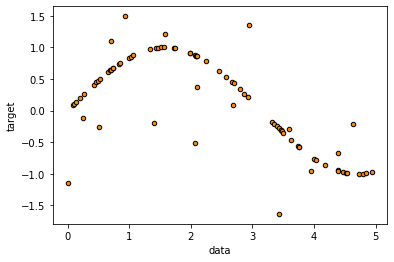

In [11]:
# Import the necessary modules and libraries
import numpy as np
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.xlabel("data")
plt.ylabel("target")
plt.show()


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
# Fit regression model
regr_1 = DecisionTreeRegressor(criterion='mse')
regr_1.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

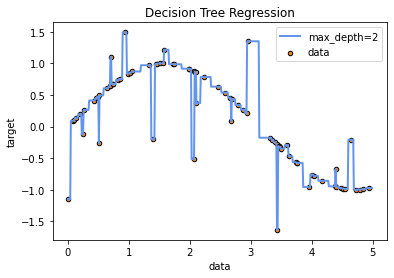

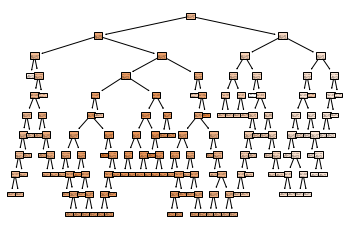

In [13]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Plot the regression trees
fig = plt.figure()
fig = tree.plot_tree(regr_1, filled=True)


# Question 1: 

There are multiple criteria which can be used to regularize a random forest to prevent it from overfitting. 

What are the different types of criteria mentioned in class?

For this question please show an example of a good fit and an example of overfitting by changing the criteria below. 


<function matplotlib.pyplot.show>

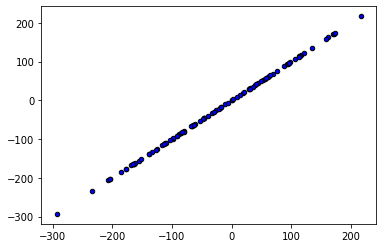

In [14]:
## Import data and a target variable to train
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

### Can change the num features and n_informative to make the RF better or worse at predicting
X,y = make_regression(n_features=10, n_informative=2,random_state=0, shuffle=True)
plt.scatter(y,y,s=20, edgecolor="black", c="blue", label="data")
plt.show
 # This plot is showing the data plotted against itself, a typical plot to show how well a RF fits the data

r^2 =  0.987602067201137
out of bag R^2 =  0.9076804590216755
100


<function matplotlib.pyplot.show>

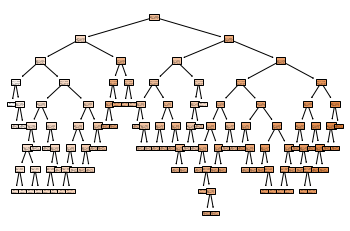

In [15]:
## Make a random forest prediction
# Create a random forest
regr = RandomForestRegressor(max_depth=9, random_state=0,oob_score = True)
# Create fits of Y, using X as predictors
regr.fit(X,y)

# Make a prediction of y, using X, see what the r-squared is
fit_x = regr.predict(X)
rsquared = regr.score(X, y, sample_weight=None)
print('r^2 = ', rsquared)

# Out of bag fit
oob = regr.oob_score_
print('out of bag R^2 = ', oob)

## See how any tree from this forest looks 

estimator = regr.estimators_
print(len(estimator))
plt.figure()

### one can change the [1] to any number 1-100 to see that tree
# A random forest is just a lot of decisions done, and then ensembled in some way
# for a RF regression, the answer is the average of all trees

tree.plot_tree(estimator[1],
               filled = True);
plt.show

<function matplotlib.pyplot.show>

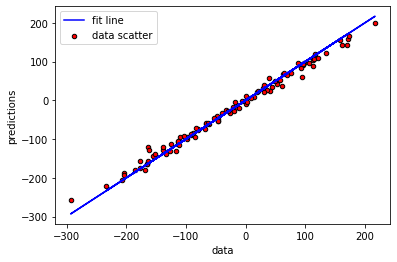

In [16]:
## Visualize fit
plt.plot(y,y,c="blue", label="fit line")
plt.scatter(y, fit_x, s=20, edgecolor="black",c="red", label="data scatter")
plt.xlabel("data")
plt.ylabel("predictions")
plt.legend()
plt.show

Feature ranking:
1. feature 3 (0.554754)
2. feature 6 (0.390646)
3. feature 9 (0.008643)
4. feature 7 (0.008563)
5. feature 2 (0.007807)
6. feature 8 (0.006805)
7. feature 1 (0.006586)
8. feature 5 (0.006230)
9. feature 0 (0.005811)
10. feature 4 (0.004155)


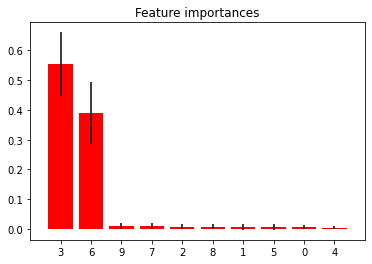

In [17]:
## Prediction Feature Ranking
# importance is calculated for each feature (predictor)

importances = regr.feature_importances_

std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Question 2: 

Describe the out of bag $r^2$, how is it calculated?

Explain why it is lower than the other $r^2$ calculated. 

Is this a good reconstruction?

## Question 3: 

Why do we rank features in a Random Forest?

What does this rank tell you?

If you were to rerun this reconstruction, would you leave any predictors out?

## For fun

The random forest is an alogrithm that is fast and easy to apply. If you are interested in learning more, you can learn more about the tuning parameters here:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

This is something at is easily apply to most physical science projects, and something one might consider for the final project. 